In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy import integrate


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv to United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv


In [ ]:
df1 = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
df1["state"] = df1["state"].astype("category")
df1.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273,470516.0,150757.0,19414,6964.0,7162,NaN,NaN,21,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
2,08/22/2020,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,08/23/2020 02:15:28 PM,Not agree,Not agree
3,07/17/2020,MP,37,37.0,0.0,1,0.0,2,2.0,0.0,0,0.0,07/19/2020 12:00:00 AM,Agree,Agree
4,08/12/2020,AS,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,08/13/2020 02:12:28 PM,NaN,NaN


In [ ]:
dfFinal = df1[['tot_cases','state','tot_death']].groupby('state').agg('max')
dfFinal.columns = dfFinal.columns.map(''.join)
dfFinal.rename_axis(None)

,tot_cases,tot_death
AK,239233,1195
AL,1295333,19290
AR,832815,11218
AS,3483,3
AZ,2007180,29268
CA,9084834,88043
CO,1345099,11968
CT,736033,10779
DC,136598,1331
DE,259539,2846


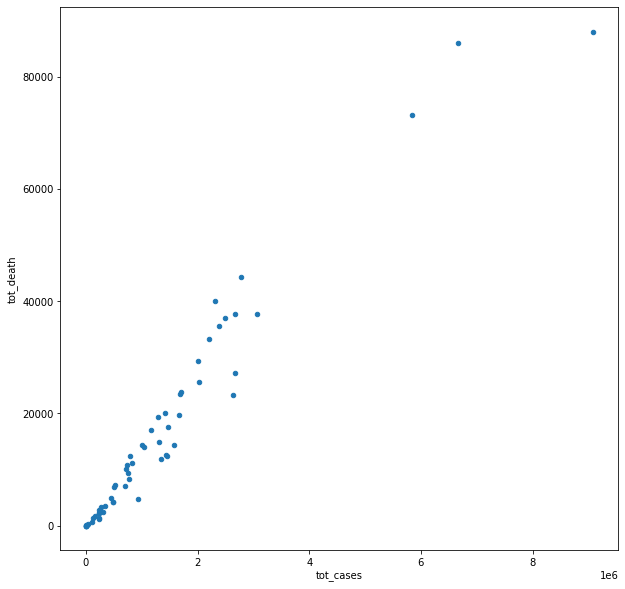

In [ ]:

dfFinal.plot(x="tot_cases", y="tot_death", kind="scatter",figsize=(10,10))


In [ ]:
maxCases = dfFinal['tot_cases'].to_numpy()
print(maxCases)
maxDeaths = dfFinal['tot_death'].to_numpy()
print(maxDeaths)
print(max(maxCases))

[ 239233 1295333  832815    3483 2007180 9084834 1345099  736033  136598
  259539 5849949       7 2496503   47265  234659  758463  443930 3066645
 1691050  770082 1314490 1168329 1697165 1011919  235790 2387521 1429051
 1411136   11065  794427  272543 2628287  239780  477830  302383 2198339
  517742  713129 2668642 2308618 2669698 1033848  703838 2780481  480081
    4024  343093       7 1468140  237109 2020500 6663137  927782 1668904
   15636  108077 1454772 1584731  497681  156112]
[ 1195 19290 11218     3 29268 88043 11968 10779  1331  2846 73244     0
 36923   346  1367  9445  4873 37645 23404  8294 14949 17117 23751 14345
  2202 35662 12621 19990    33 12396  3246 23203  2245  4161  2452 33230
  7255 10091 27230 40080 37793 14010  7139 44260  4166     6  3522     0
 17591  2883 25599 85946  4714 19692   111   587 12478 14296  6823  1791]
9084834


In [ ]:
linModel = np.poly1d(np.polyfit(maxCases,maxDeaths, 1))
poly2Model =np.poly1d(np.polyfit(maxCases,maxDeaths, 2))
poly3Model =np.poly1d(np.polyfit(maxCases,maxDeaths, 3))
poly4Model =np.poly1d(np.polyfit(maxCases,maxDeaths, 4))

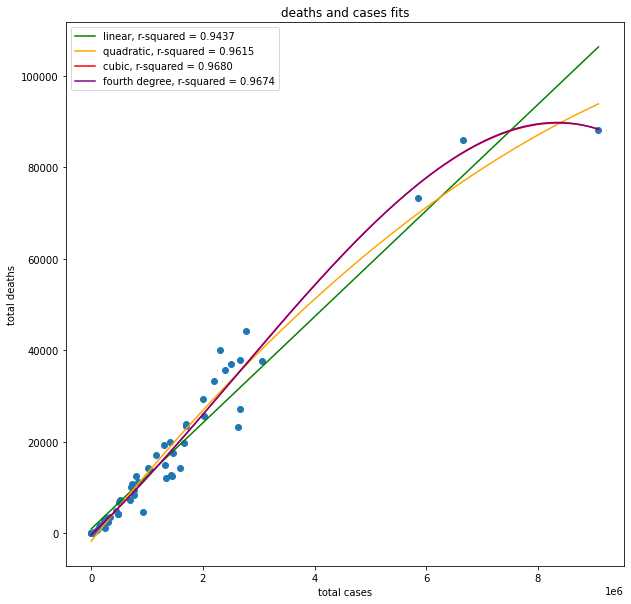

In [ ]:
polyLine = np.linspace(0,9084834,1000)
plt.rcParams['figure.figsize'] = [10,10]
plt.scatter(maxCases,maxDeaths)


plt.plot(polyLine, linModel(polyLine),color = 'green', label='linear, r-squared = 0.9437')
plt.plot(polyLine, poly2Model(polyLine),color = 'orange',label = 'quadratic, r-squared = 0.9615')
plt.plot(polyLine, poly3Model(polyLine),color = 'red',label = 'cubic, r-squared = 0.9680')
plt.plot(polyLine, poly4Model(polyLine),color = 'purple',label = 'fourth degree, r-squared = 0.9674')
plt.xlabel('total cases')
plt.ylabel('total deaths')
plt.title('deaths and cases fits')
plt.legend()

In [ ]:
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

In [ ]:
print(adjR(maxCases,maxDeaths,1))
print(adjR(maxCases,maxDeaths,2))
print(adjR(maxCases,maxDeaths,3))
print(adjR(maxCases,maxDeaths,4))


{'r_squared': 0.9437242519159079}
{'r_squared': 0.9615390736704579}
{'r_squared': 0.9680145097970179}
{'r_squared': 0.9674349821997216}


All of the r-squared values are quite high, indicating that the relationship is decently linear, only be approximated slightly better with higher order polynomial functions. I would choose the linear model since it makes sense that there is a constant probability that each infected person dies, which results in a linear relationsip between cases and deaths.

In [ ]:
mostRecentdf = df1[df1['submission_date'] == "03/30/2022"]
mostRecentdf = mostRecentdf.sort_values(by=['new_case'], ascending = False)
print(mostRecentdf)

      submission_date state  tot_cases  conf_cases  prob_cases  new_case  \
35287      03/30/2022    AZ    2007180   1774430.0    232750.0     10143   
10168      03/30/2022    CA    9084834   8487070.0    597764.0      2761   
1777       03/30/2022   NYC    2308618   1964531.0    344087.0      2485   
43736      03/30/2022    FL    5849949         NaN         NaN      2366   
9227       03/30/2022    NY    2668642         NaN         NaN      1955   
42481      03/30/2022    TX    6663137         NaN         NaN      1934   
364        03/30/2022    MA    1697165   1562922.0    134243.0      1415   
23450      03/30/2022    NJ    2198339   1897628.0    300711.0      1369   
12085      03/30/2022    IL    3066645   3066645.0         0.0      1324   
38455      03/30/2022    HI     234659         NaN         NaN      1090   
26368      03/30/2022    NC    2628287   2195081.0    433206.0      1067   
10127      03/30/2022    MI    2387521   2078951.0    308570.0      1049   
11789      0

[10143  2761  2485  2366  1955  1934  1415  1369  1324  1090  1067  1049
   947   833   816   813   607   592   574   560   539   458   421   405
   373   347   281   277   238   232   227   206   206   205   154   146
   138   135   134   133   130   128   115    97    86    45    34    34
    10     4     0     0     0     0     0     0     0     0     0   -70]


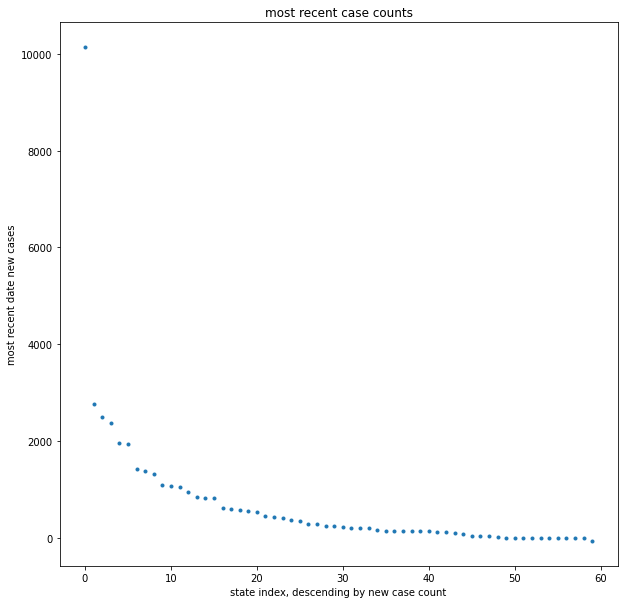

In [ ]:
recentNewCases = mostRecentdf['new_case'].to_numpy()

xspace = range(0,60)
plt.plot(xspace,recentNewCases,'.')
plt.xlabel('state index, descending by new case count')
plt.ylabel('most recent date new cases')
plt.title('most recent case counts')
print(recentNewCases)

In [ ]:


df1['submission_date'] = pd.to_datetime(df1['submission_date'])
sortedByTimedf = df1.sort_values(by='submission_date')
sortedByTimedf.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
45932,2020-01-22,TN,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
14954,2020-01-22,CT,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
23594,2020-01-22,WY,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
9124,2020-01-22,SD,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,Agree
34002,2020-01-22,KY,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [ ]:
WANewCaseSeries = sortedByTimedf[sortedByTimedf['state'] == 'WA']['new_case'].to_numpy()
KYNewCaseSeries = sortedByTimedf[sortedByTimedf['state'] == 'KY']['new_case'].to_numpy()
GANewCaseSeries = sortedByTimedf[sortedByTimedf['state'] == 'GA']['new_case'].to_numpy()
CANewCaseSeries = sortedByTimedf[sortedByTimedf['state'] == 'CA']['new_case'].to_numpy()

WATotalCaseSeries = sortedByTimedf[sortedByTimedf['state'] == 'WA']['tot_cases'].to_numpy()
KYTotalCaseSeries = sortedByTimedf[sortedByTimedf['state'] == 'KY']['tot_cases'].to_numpy()
GATotalCaseSeries = sortedByTimedf[sortedByTimedf['state'] == 'GA']['tot_cases'].to_numpy()
CATotalCaseSeries = sortedByTimedf[sortedByTimedf['state'] == 'CA']['tot_cases'].to_numpy()

tspace = range(0,799)

Text(0.5, 1.0, 'WA New Cases Time Series')

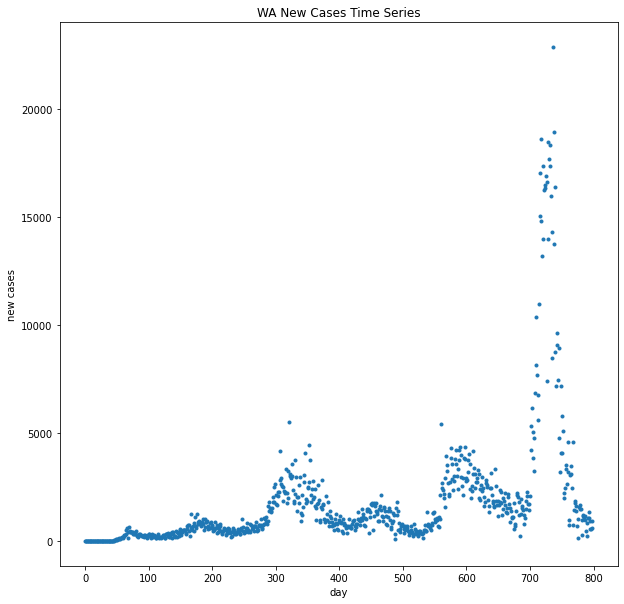

In [ ]:
plt.plot(tspace,WANewCaseSeries,'.')

plt.xlabel('day')
plt.ylabel('new cases')
plt.title('WA New Cases Time Series')

Text(0.5, 1.0, 'CA New Cases Time Series')

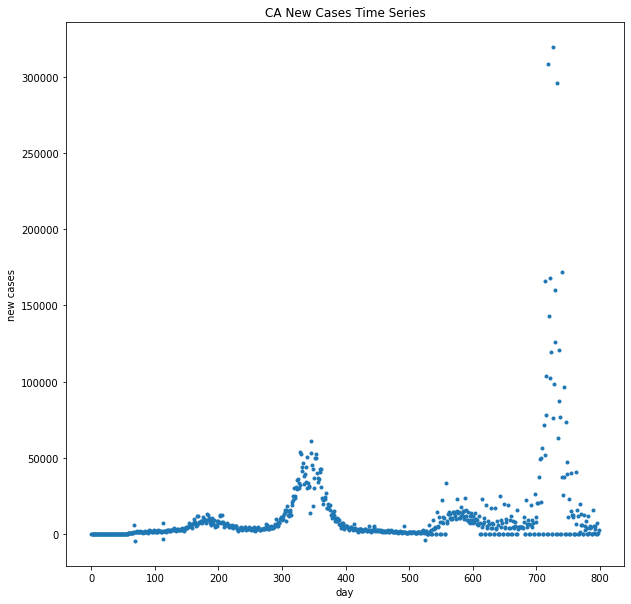

In [ ]:
plt.plot(tspace,CANewCaseSeries,'.')
plt.xlabel('day')
plt.ylabel('new cases')
plt.title('CA New Cases Time Series')

Text(0.5, 1.0, 'KY New Cases Time Series')

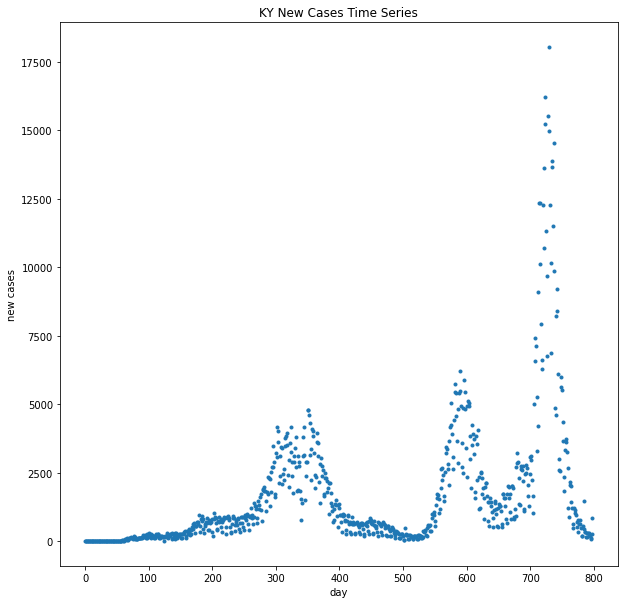

In [ ]:
plt.plot(tspace,KYNewCaseSeries,'.')
plt.xlabel('day')
plt.ylabel('new cases')
plt.title('KY New Cases Time Series')

Text(0.5, 1.0, 'GA New Cases Time Series')

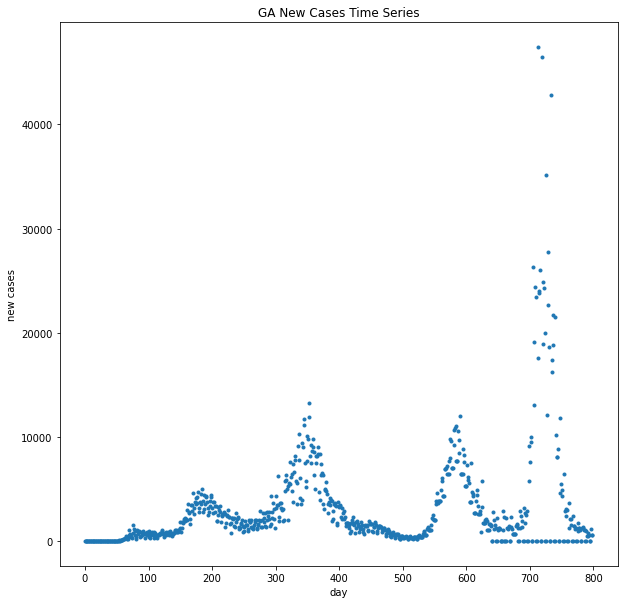

In [ ]:
plt.plot(tspace,GANewCaseSeries,'.')
plt.xlabel('day')
plt.ylabel('new cases')
plt.title('GA New Cases Time Series')

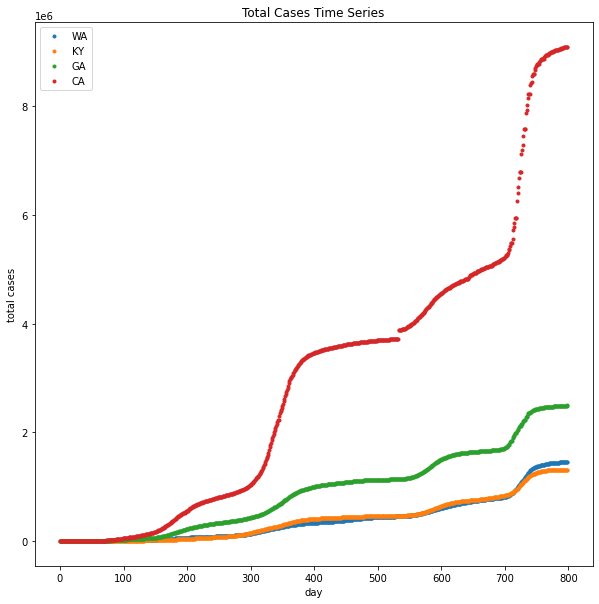

In [ ]:
plt.plot(tspace,WATotalCaseSeries,'.',label = 'WA')
plt.plot(tspace,KYTotalCaseSeries,'.',label = 'KY')
plt.plot(tspace,GATotalCaseSeries,'.', label = 'GA')
plt.plot(tspace,CATotalCaseSeries,'.', label = 'CA')

plt.xlabel('day')
plt.ylabel('total cases')
plt.title('Total Cases Time Series')
plt.legend()

In [ ]:
CApop = 3.951e7
WApop = 7.615e6
KYpop = 4.468e7
GApop = 1.062e7

WANewCaseSeriesNorm =  WANewCaseSeries/WApop
KYNewCaseSeriesNorm = KYNewCaseSeries/KYpop
GANewCaseSeriesNorm = GANewCaseSeries/GApop
CANewCaseSeriesNorm  = CANewCaseSeries/CApop

WATotalCaseSeriesNorm = WATotalCaseSeries/WApop
KYTotalCaseSeriesNorm = KYTotalCaseSeries/KYpop 
GATotalCaseSeriesNorm = GATotalCaseSeries/GApop 
CATotalCaseSeriesNorm = CATotalCaseSeries/CApop

Text(0.5, 1.0, 'WA New Cases Time Series Normalized')

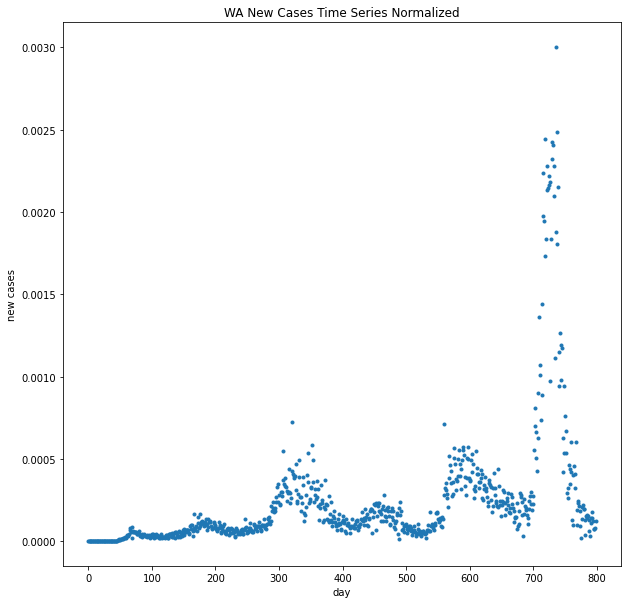

In [ ]:
plt.plot(tspace,WANewCaseSeriesNorm,'.')

plt.xlabel('day')
plt.ylabel('new cases')
plt.title('WA New Cases Time Series Normalized')

Text(0.5, 1.0, 'KY New Cases Time Series Normalized')

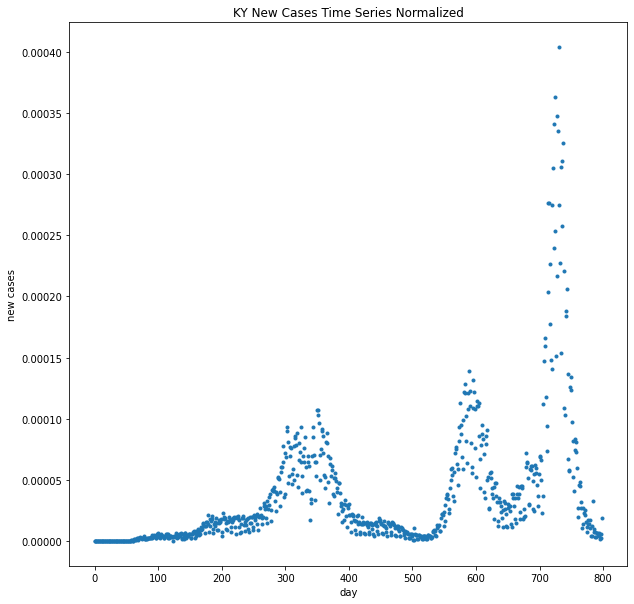

In [ ]:
plt.plot(tspace,KYNewCaseSeriesNorm,'.')

plt.xlabel('day')
plt.ylabel('new cases')
plt.title('KY New Cases Time Series Normalized')

Text(0.5, 1.0, 'GA New Cases Time Series Normalized')

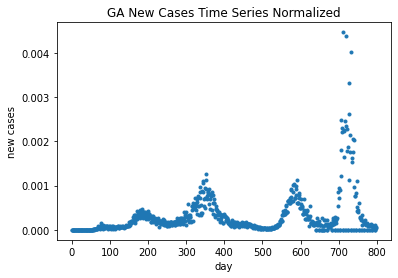

In [ ]:
plt.plot(tspace,GANewCaseSeriesNorm,'.')

plt.xlabel('day')
plt.ylabel('new cases')
plt.title('GA New Cases Time Series Normalized')

Text(0.5, 1.0, 'CA New Cases Time Series Normalized')

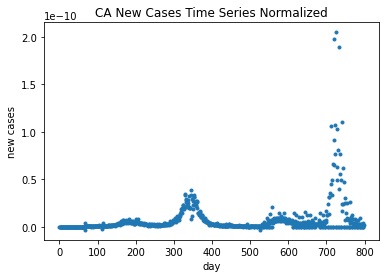

In [ ]:
plt.plot(tspace,CANewCaseSeriesNorm,'.')

plt.xlabel('day')
plt.ylabel('new cases')
plt.title('CA New Cases Time Series Normalized')

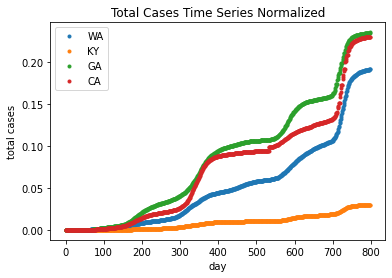

In [ ]:
plt.plot(tspace,WATotalCaseSeriesNorm,'.',label = 'WA')
plt.plot(tspace,KYTotalCaseSeriesNorm,'.',label = 'KY')
plt.plot(tspace,GATotalCaseSeriesNorm,'.', label = 'GA')
plt.plot(tspace,CATotalCaseSeriesNorm,'.', label = 'CA')

plt.xlabel('day')
plt.ylabel('total cases')
plt.title('Total Cases Time Series Normalized')
plt.legend()

################ Part 2 Begins Here #####################

In [ ]:
from google.colab import files
ovarianGenes = files.upload()

Saving ovarian_cancer.csv to ovarian_cancer.csv


In [ ]:
genedf = pd.read_csv('ovarian_cancer.csv')
genedf.index = [x for x in range(0,len(genedf.values))]

genedf["status"] = genedf["status"].astype("category")
genedf.head()

,status,patients,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_3990,gene_3991,gene_3992,gene_3993,gene_3994,gene_3995,gene_3996,gene_3997,gene_3998,gene_3999
0,Cancer,P0,0.063915,0.033242,0.018484,0.008618,0.035629,0.037925,0.028865,0.061731,...,0.035119,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085
1,Cancer,P1,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,...,0.050841,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975
2,Cancer,P2,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,...,0.029078,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569
3,Cancer,P3,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,...,0.054675,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482
4,Cancer,P4,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,...,0.063163,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289


Text(0, 0.5, 'count')

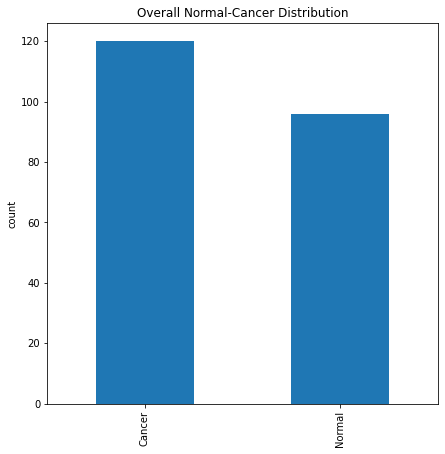

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
genedf['status'].value_counts().plot(kind='bar')
plt.title('Overall Normal-Cancer Distribution')
plt.ylabel('count')



Note that in the above plot the data is mostly balanced, ie the number of cancerous and normal samples has approximate parity. 3999 genes in total were measured.


In [ ]:
# genedf.plot(x = genedf.index[genedf['status'] == 'Cancer'], y=genedf[genedf['status'] == 'Cancer']['gene_1'],figsize=(9, 8))
# gene1Cancer = genedf[genedf['status'] == 'Cancer']['gene_1'].to_numpy()
# gene1Normal = genedf[genedf['status'] == 'Normal']['gene_1'].to_numpy()
# plt.plot(tspace,WATotalCaseSeriesNorm,'.',label = 'WA')

Text(0.5, 1.0, 'gene_1')

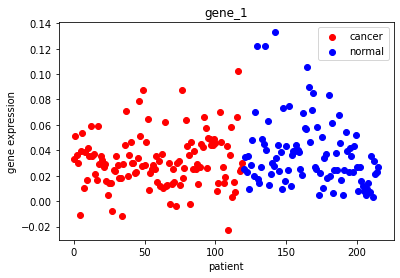

In [ ]:
plt.scatter(genedf.index[genedf['status'] == 'Cancer'], genedf['gene_1'][genedf['status'] == 'Cancer'],color = 'red',label = 'cancer')
plt.scatter(genedf.index[genedf['status'] == 'Normal'], genedf['gene_1'][genedf['status'] == 'Normal'], color = 'blue', label = 'normal')
plt.legend()
plt.xlabel('patient')
plt.ylabel('gene expression')
plt.title('gene_1')


Text(0.5, 1.0, 'gene_3002')

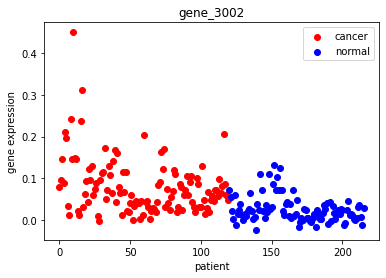

In [ ]:
plt.scatter(genedf.index[genedf['status'] == 'Cancer'], genedf['gene_3002'][genedf['status'] == 'Cancer'],color = 'red',label = 'cancer')
plt.scatter(genedf.index[genedf['status'] == 'Normal'], genedf['gene_3002'][genedf['status'] == 'Normal'], color = 'blue', label = 'normal')
plt.legend()
plt.xlabel('patient')
plt.ylabel('gene expression')
plt.title('gene_3002')

In [ ]:
# log2 fold change gene_1

gene1NormalMean = genedf['gene_1'][genedf['status'] == 'Normal'].mean()
gene1CancerMean = genedf['gene_1'][genedf['status'] == 'Cancer'].mean()

gene1FoldChange = math.log(gene1CancerMean/gene1NormalMean,2)
print(gene1FoldChange)


-0.23802293718285034


In [ ]:
# log2 fold change gene_3002

gene3002NormalMean = genedf['gene_3002'][genedf['status'] == 'Normal'].mean()
gene3002CancerMean = genedf['gene_3002'][genedf['status'] == 'Cancer'].mean()

gene3002FoldChange = math.log(gene3002CancerMean/gene3002NormalMean,2)
print(gene3002FoldChange)


1.6255639181537604


In [ ]:
#t-test for gene_1 between cancer and normal groups
ttest_ind(genedf['gene_1'][genedf['status'] == 'Normal'].dropna(),genedf['gene_1'][genedf['status'] == 'Cancer'].dropna())

Ttest_indResult(statistic=1.7501709816564117, pvalue=0.08152199430351342)

In [ ]:
#t-test for gene_1 between cancer and normal groups
ttest_ind(genedf['gene_3002'][genedf['status'] == 'Normal'].dropna(),genedf['gene_3002'][genedf['status'] == 'Cancer'].dropna())

Ttest_indResult(statistic=-7.379612834453349, pvalue=3.4629258618496455e-12)

In [ ]:
# Mann-Whitney-Wilcoxon test between gene_1 
mannwhitneyu(genedf['gene_1'][genedf['status'] == 'Normal'].dropna(),genedf['gene_1'][genedf['status'] == 'Cancer'].dropna())


MannwhitneyuResult(statistic=5373.0, pvalue=0.19855158370498954)

In [ ]:
# Mann-Whitney-Wilcoxon test between gene_1 
mannwhitneyu(genedf['gene_3002'][genedf['status'] == 'Normal'].dropna(),genedf['gene_3002'][genedf['status'] == 'Cancer'].dropna())


MannwhitneyuResult(statistic=2149.0, pvalue=1.2821739807700903e-15)

In both the tests, we have a significant result for gene_3002 and not for gene_1, assuming that the threshold for significance is p = 0.05. 







###################### Part 3 Begins Here ############################

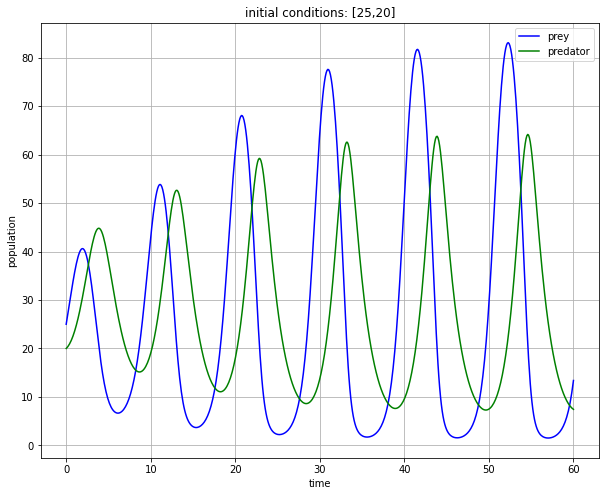

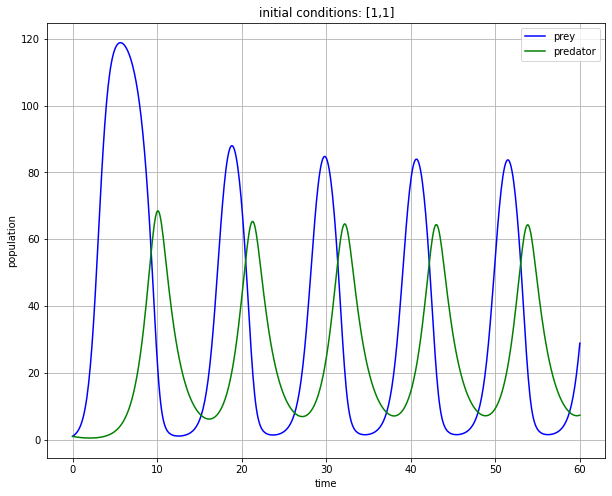

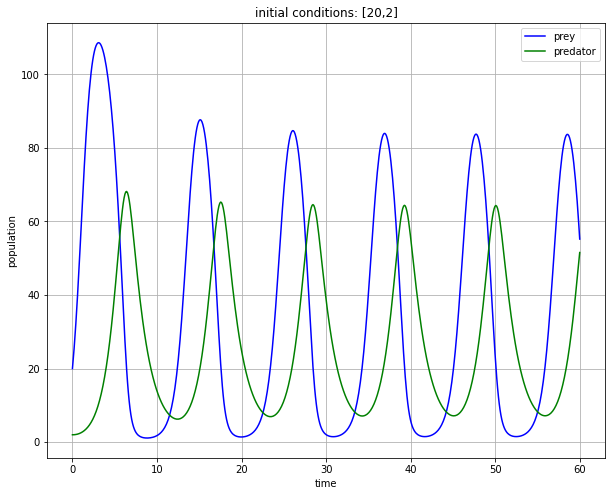

In [ ]:

# model constants
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6



def pop(S, t, a, b, c, d, k, r):

    x, y = S

    dydt = [r * x * (1 - (x / k)) - (a * x * y)/(c + x),
           (b * a * x * y) / (c + x)  - (d * y)]

    return dydt


#initial conditions

init1 = [25,20]
init2 = [1,1]
init3 = [20,2]

t = np.linspace(0, 60, 600)



sol1 = integrate.odeint(pop, init1, t, args=(a,b,c,d,k,r))
sol2 = integrate.odeint(pop, init2, t, args=(a,b,c,d,k,r))
sol3 = integrate.odeint(pop, init3, t, args=(a,b,c,d,k,r))


plt.plot(t, sol1[:, 0], 'b', label='prey')

plt.plot(t, sol1[:, 1], 'g', label='predator')

plt.legend(loc='best')

plt.xlabel('time')
plt.ylabel('population')
plt.title('initial conditions: [25,20]')

plt.grid()

plt.show()




plt.plot(t, sol2[:, 0], 'b', label='prey')

plt.plot(t, sol2[:, 1], 'g', label='predator')

plt.legend(loc='best')

plt.xlabel('time')
plt.ylabel('population')
plt.title('initial conditions: [1,1]')

plt.grid()

plt.show()




plt.plot(t, sol3[:, 0], 'b', label='prey')

plt.plot(t, sol3[:, 1], 'g', label='predator')

plt.legend(loc='best')

plt.xlabel('time')
plt.ylabel('population')
plt.title('initial conditions: [20,2]')
plt.rcParams['figure.figsize'] = [12,8]
plt.grid()

plt.show()